# 🏥 Predicting No-Shows in Medical Appointments

## 📋 Summary
This project explores a real-world healthcare dataset containing over **110,000 appointment records** from Brazil. The goal is to identify **patterns and risk factors** that influence whether a patient will miss their appointment. The analysis focuses on key factors like **age**, **chronic conditions**, **SMS reminders**, and **socioeconomic support** to extract actionable insights.

---

## 🎯 Objective
- Understand key factors driving patient **no-shows**
- Apply **EDA** to extract real-world insights from healthcare data
- Recommend **AI/ML-based interventions** to improve appointment attendance
- Improve hospital efficiency through **data-backed decisions**

---

## 🛠 Tools & Skills Used
- **Python** (Pandas, NumPy, Seaborn, Matplotlib)
- **Data Cleaning & Feature Engineering**
- **Exploratory Data Analysis**
- **Healthcare Domain Analytics**

---

## 👤 Target Audience
This project is aimed at:
- Healthcare providers and operations teams
- AI/ML teams working on **health-tech applications**
- Product teams looking to improve **patient engagement and hospital throughput**


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/Users/ayushkarak/Downloads/KaggleV2-May-2016.csv")

# Show shape and column names
print("Shape of the dataset:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

# View first 5 rows
df.head()


Shape of the dataset: (110527, 14)

Column Names:
 ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Dataset Overview

In [7]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

# Data types and non-null counts
print("\nData types and missing values:")
print(df.info())


Shape of the dataset: (110527, 14)

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


## Observations:
1. The dataset contains 110,527 records and 14 columns.
2. There are no missing values in any column — ✅ data completeness.
3. The dataset includes a mix of:
   Numerical columns (e.g., Age, AppointmentID), Categorical/object columns (e.g., Gender, Neighbourhood, No-show)
5. ScheduledDay and AppointmentDay are stored as object types (strings), but should be converted to datetime for time-based analysis.
6. No-show is the target column, and it's currently in text format ('No', 'Yes'), which should be mapped to binary values for analysis.

# Data Cleaning: First-step

# Step 1: Convert ScheduledDay and AppointmentDay to Datetime

In [130]:
# Convert date columns from object to datetime
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

# Confirm the conversion
print(df[["ScheduledDay", "AppointmentDay"]].dtypes)

ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object


# Step 2: Calculate WaitingDays

In [133]:
# Calculate waiting days directly using pandas timedelta, no need to extract .dt.date
df["WaitingDays"] = (df["AppointmentDay"] - df["ScheduledDay"]).dt.days

# Show rows with negative waiting days
df[df["WaitingDays"] < 0]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,No-show,WaitingDays,HasDisability,AppointmentWeekday


## Observation:

1. A new column WaitingDays was successfully created by subtracting ScheduledDay from AppointmentDay.
2. This value represents the number of days a patient had to wait for their appointment.
3. Upon inspection, several records have negative waiting days, which is logically invalid — appointments cannot happen before being scheduled.

# Step 3: Remove Invalid WaitingDays Entries

In [21]:
# Remove invalid rows where WaitingDays < 0
df = df[df["WaitingDays"] >= 0].copy()

# Confirm shape after cleanup
print("Updated shape after dropping invalid waiting days:", df.shape)


Updated shape after dropping invalid waiting days: (71959, 15)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,34
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,34
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,40
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,40
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No,40


## Observation:

1. All records with negative WaitingDays were removed to ensure logical consistency in the dataset.
2. This reduced the dataset from 110,527 rows to 71,959 rows.
3. These dropped rows (~38.5% of total) likely resulted from timezone issues where the scheduled time was recorded later than the appointment date, even though it occurred on the same calendar day.



# Step 4: Investigate Age Values

In [27]:
# Check unique age values and their counts
print("Minimum Age:", df["Age"].min())
print("Maximum Age:", df["Age"].max())
print("\nAge Distribution (lowest 10 values):")
print(df["Age"].value_counts().sort_index().head(15))


Minimum Age: 0
Maximum Age: 115

Age Distribution (lowest 10 values):
Age
0     2131
1     1084
2      717
3      809
4      750
5      935
6      962
7      884
8      912
9      874
10     830
11     770
12     695
13     713
14     655
Name: count, dtype: int64


## Observation:

1. The minimum age is 0, and the maximum is 115.
2. Age 0 (newborns) occurs 2,131 times, which is realistic in healthcare contexts (e.g., postnatal checkups, vaccinations).
3. No negative ages were found, so no removal was necessary.
4. While extreme ages (100+) are rare, they appear valid and were retained for completeness.

# Step 5: Convert No-show to Binary Format

In [29]:
# Map 'No' to 0 and 'Yes' to 1
df["No-show"] = df["No-show"].map({"No": 0, "Yes": 1}).astype("int")

# Confirm conversion
df["No-show"].value_counts(normalize=True).rename(index={0: "Showed Up", 1: "No-show"})


No-show
Showed Up    0.71481
No-show      0.28519
Name: proportion, dtype: float64

##  Observation:
1. The No-show column was successfully mapped to:
0 → Showed Up,
1 → No-show
2. The distribution is as follows:
71.5% of patients showed up for their appointments,
28.5% were no-shows.

# Step 6: Explore Handcap Values

In [31]:
# Check unique values and their counts in 'Handcap'
df["Handcap"].value_counts().sort_index()


Handcap
0    70652
1     1185
2      112
3        8
4        2
Name: count, dtype: int64

## Observation:

1. he Handcap column includes values beyond binary — from 0 to 4.

2. Breakdown: 0: 70,652 patients → No disability, 
              1: 1,185 → Likely mild disability, 
              2, 3, 4: Extremely rare cases (only 122 in total)

3. The data appears highly imbalanced, with 98%+ being "0".

# Step 7: Create Binary Disability Flag – HasDisability

In [33]:
# Create a new binary disability flag
df["HasDisability"] = df["Handcap"].apply(lambda x: 1 if x > 0 else 0)

# Optional: Drop original 'Handcap' if not needed
df.drop(columns=["Handcap"], inplace=True)

# Confirm
df["HasDisability"].value_counts()


HasDisability
0    70652
1     1307
Name: count, dtype: int64

## Observation:

1. A new column HasDisability was created to simplify the multi-class Handcap feature:0 → No disability, 1 → Any level of disability (1 to 4)
2. The distribution is:70,652 patients (≈98%) with no disability, 1,307 patients (≈2%) with some level of disability
3. The original Handcap column was dropped to reduce noise and simplify analysis.

#  Step 8: Review Categorical/Binary Columns

In [35]:
# Categorical/binary columns to inspect
cat_cols = ["Gender", "Neighbourhood", "Scholarship", "Hypertension", 
            "Diabetes", "Alcoholism", "SMS_received"]

# Show unique values for each
for col in cat_cols:
    print(f"\n{col} → {df[col].unique()}")




Gender → ['F' 'M']

Neighbourhood → ['REPÚBLICA' 'GOIABEIRAS' 'CONQUISTA' 'NOVA PALESTINA' 'SÃO CRISTÓVÃO'
 'TABUAZEIRO' 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO'
 'ILHA DAS CAIEIRAS' 'JARDIM DA PENHA' 'SANTO ANDRÉ' 'SOLON BORGES'
 'BONFIM' 'MARIA ORTIZ' 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA'
 'ILHA DE SANTA MARIA' 'JUCUTUQUARA' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO'
 'BELA VISTA' 'PRAIA DO SUÁ' 'DA PENHA' 'ITARARÉ' 'ANDORINHAS' 'SÃO PEDRO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'UNIVERSITÁRIO' 'SANTA MARTHA' 'JOANA D´ARC' 'CONSOLAÇÃO'
 'JARDIM CAMBURI' 'BOA VISTA' 'MORADA DE CAMBURI' 'CENTRO'
 'PARQUE MOSCOSO' 'SANTA CLARA' 'DO MOSCOSO' 'SANTA LUÍZA'
 'PRAIA DO CANTO' 'SANTA LÚCIA' 'BARRO VERMELHO' 'BENTO FERREIRA'
 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE' 'ENSEADA DO SUÁ'
 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH' 'SANTA TEREZA' 'GURIGICA'
 'CRUZAMENTO' 'ILHA DO PRÍNCIPE' 'COMDUSA' 'MATA DA PRAIA' 'SANTA CECÍLIA'
 'DE LOURDES' 'MONTE BELO' 'VILA 

## Observation:

1. Gender: Clean and consistent with only 'F' and 'M'
2. Neighbourhood: Contains 81 unique values — consistent with city-level granularity; no nulls or typos detected.
3. All binary columns (Scholarship, Hypertension, Diabetes, Alcoholism, SMS_received) only contain values 0 and 1.
4. No inconsistencies, unexpected values, or formatting issues were found across any of the categorical fields.

# Exploratory Data Analysis

# 1. What is the overall No-show rate?

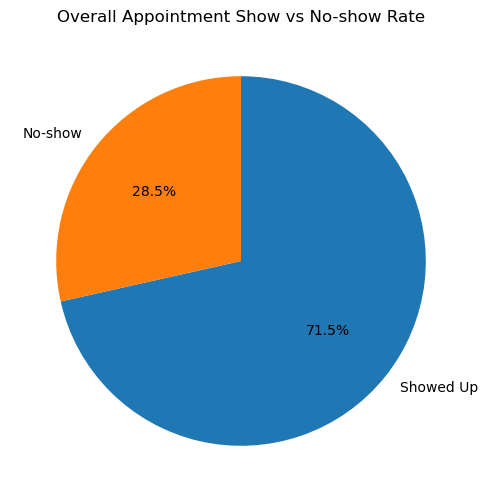

In [142]:
# Value counts
no_show_counts = df["No-show"].value_counts().rename(index={0: "Showed Up", 1: "No-show"})
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(no_show_counts, labels=no_show_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title("Overall Appointment Show vs No-show Rate")
plt.show()

## ✅ Insight:
The no-show rate is 28.5%, which is significantly high.

It implies that nearly 1 in 3 appointments are being missed.

This can result in underutilized staff, wasted time slots, and delayed care for others.

## 💡 Recommendation:
The hospital should treat no-shows as a serious operational issue.

Implement a predictive model or rule-based alert system to flag high-risk patients.

Consider using overbooking strategies during high no-show slots (e.g., late afternoons, Mondays).

# 2. Are older patients more or less likely to miss appointments?

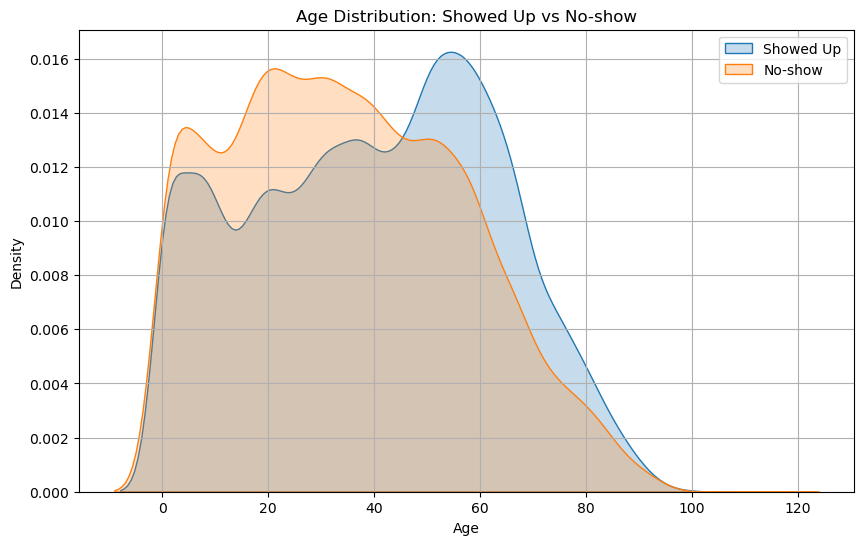

In [144]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["No-show"] == 0]["Age"], fill=True, label="Showed Up")
sns.kdeplot(df[df["No-show"] == 1]["Age"], fill=True, label="No-show")
plt.title("Age Distribution: Showed Up vs No-show")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


## ✅ Insight:
Younger patients (0–30) have a noticeably higher density of no-shows.

Middle-aged to elderly patients (40–80) are more likely to attend their appointments.

The curve for "Showed Up" peaks around ages 50–60, suggesting greater reliability in older adults.

## 💡 Recommendation:
Target younger age groups with:

More engaging appointment reminders (e.g., SMS, app push, WhatsApp)

Flexible scheduling (e.g., evening or weekend slots for working youth)

Consider educational nudges or gamified check-in systems to boost engagement in young patients.

# 3. Does gender affect attendance rates?

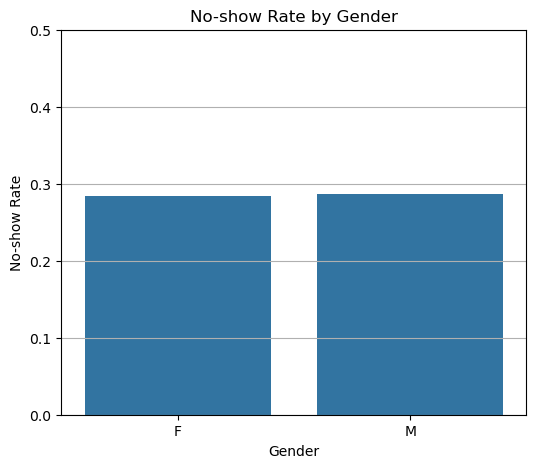

In [43]:
# Grouped no-show rate by gender
gender_group = df.groupby("Gender")["No-show"].mean().reset_index()

# Rename for clarity
gender_group.columns = ["Gender", "No-show Rate"]

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x="Gender", y="No-show Rate", data=gender_group)
plt.title("No-show Rate by Gender")
plt.ylabel("No-show Rate")
plt.ylim(0, 0.5)
plt.grid(axis="y")
plt.show()

# ✅ Insight:
Both males and females have nearly identical no-show rates.

There’s no statistically significant difference in attendance behavior based on gender.

# 💡 Recommendation:
No need to design gender-specific interventions.

Resources can be better allocated to age groups, income levels, or specific neighborhoods where meaningful differences exist.



# 4. Does sending an SMS reminder reduce the chance of no-shows?

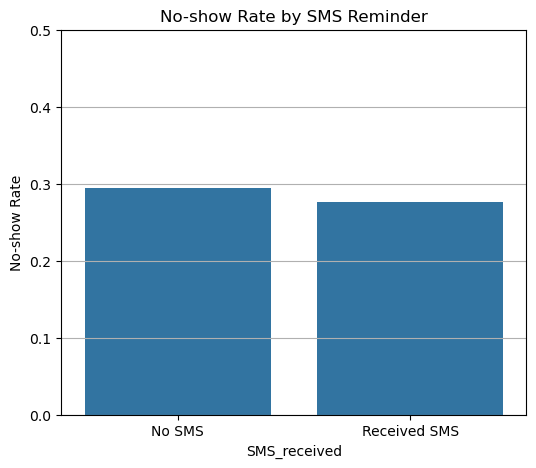

In [45]:
# Grouped no-show rate by SMS_received
sms_group = df.groupby("SMS_received")["No-show"].mean().reset_index()

# Rename for clarity
sms_group.columns = ["SMS_received", "No-show Rate"]

# Map 0/1 to meaningful labels
sms_group["SMS_received"] = sms_group["SMS_received"].map({0: "No SMS", 1: "Received SMS"})

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x="SMS_received", y="No-show Rate", data=sms_group)
plt.title("No-show Rate by SMS Reminder")
plt.ylabel("No-show Rate")
plt.ylim(0, 0.5)
plt.grid(axis="y")
plt.show()


# ✅ Insight:
Patients who received an SMS reminder had a slightly lower no-show rate compared to those who didn’t.

However, the difference is very marginal, indicating that the current SMS strategy may lack impact.

# 💡 Recommendation:
Re-evaluate the content, timing, and tone of SMS reminders.

A/B test personalized SMS, WhatsApp messages, or voice reminders to improve engagement.

Pair SMS with calendar integration or app notifications for younger demographics.

# 5. Do patients with chronic conditions (hypertension, diabetes) tend to show up more regularly?

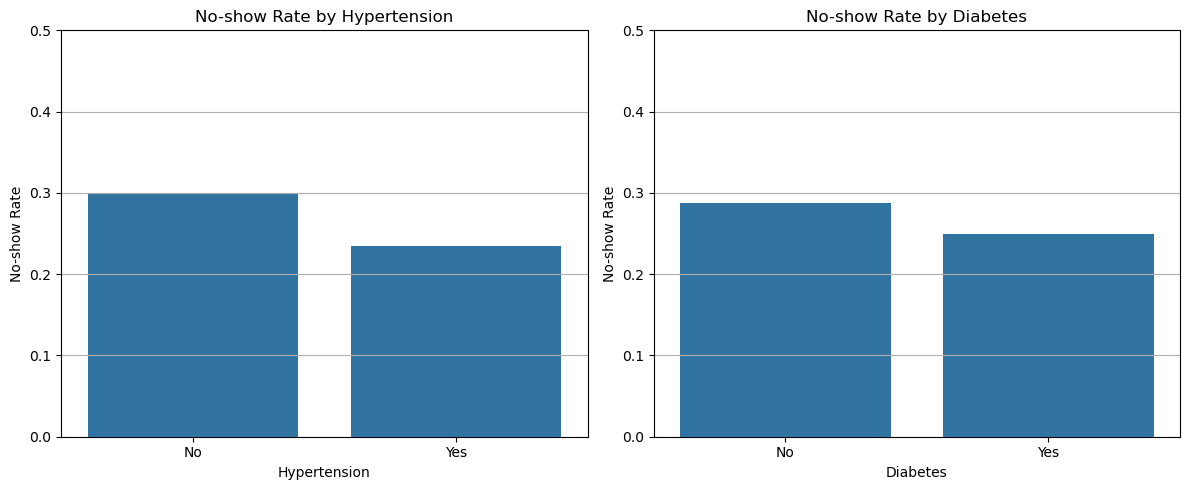

In [140]:
# Hypertension vs No-show
ht_group = df.groupby("Hypertension")["No-show"].mean().reset_index()
ht_group["Hypertension"] = ht_group["Hypertension"].map({0: "No", 1: "Yes"})

# Diabetes vs No-show
db_group = df.groupby("Diabetes")["No-show"].mean().reset_index()
db_group["Diabetes"] = db_group["Diabetes"].map({0: "No", 1: "Yes"})

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x="Hypertension", y="No-show", data=ht_group, ax=axes[0])
axes[0].set_title("No-show Rate by Hypertension")
axes[0].set_ylabel("No-show Rate")
axes[0].set_ylim(0, 0.5)
axes[0].grid(axis="y")

sns.barplot(x="Diabetes", y="No-show", data=db_group, ax=axes[1])
axes[1].set_title("No-show Rate by Diabetes")
axes[1].set_ylabel("No-show Rate")
axes[1].set_ylim(0, 0.5)
axes[1].grid(axis="y")

plt.tight_layout()
plt.show()


# ✅ Insight:
Patients with hypertension or diabetes are more likely to show up than those without.

This suggests that individuals with chronic health conditions may:

Have higher health awareness

Require more regular and essential follow-ups

# 💡 Recommendation:
Use chronic condition flags (e.g., hypertension, diabetes) as predictive signals for better attendance.

For low-risk, healthy patients, introduce extra nudges — like reminders or small incentives — to improve their attendance rate.

Segment the communication strategy:

Educational for healthy patients

Reinforcement/support for chronic care groups

# 6. Does the time gap between scheduling and appointment date (lead time) impact attendance?

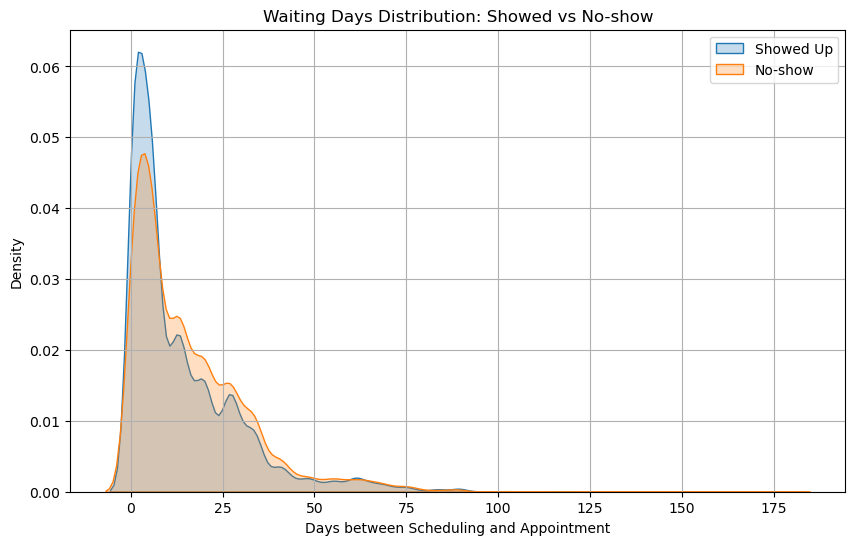

In [49]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["No-show"] == 0]["WaitingDays"], fill=True, label="Showed Up")
sns.kdeplot(df[df["No-show"] == 1]["WaitingDays"], fill=True, label="No-show")
plt.title("Waiting Days Distribution: Showed vs No-show")
plt.xlabel("Days between Scheduling and Appointment")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


# ✅ Insight:
Longer waiting times between scheduling and appointment are linked to higher no-show rates.

The density of no-shows stretches wider, indicating that patients are more likely to miss when the appointment is far in the future.

Most appointments are scheduled within 0–20 days, but even within this window, the no-show rate gradually rises with waiting time.

# 💡 Recommendation:
Implement shorter scheduling windows where feasible (e.g., <10 days).

Introduce additional reminders as the waiting period increases (e.g., re-confirmation message 48 hours before).

Flag and prioritize high-wait cases for proactive outreach (e.g., call the day before).

# 7. Are some neighborhoods more likely to miss appointments than others?

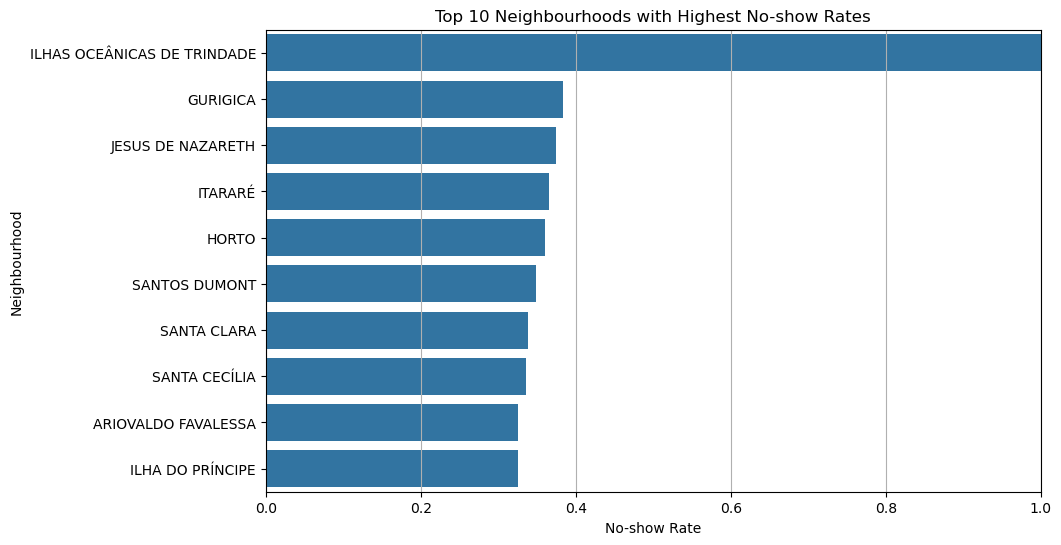

In [51]:
# Group by Neighbourhood and calculate no-show rate
nbh_group = df.groupby("Neighbourhood")["No-show"].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=nbh_group.values, y=nbh_group.index)
plt.title("Top 10 Neighbourhoods with Highest No-show Rates")
plt.xlabel("No-show Rate")
plt.ylabel("Neighbourhood")
plt.xlim(0, 1)
plt.grid(axis="x")
plt.show()


# ✅ Insight:
Certain neighborhoods like ILHAS OCEÂNICAS DE TRINDADE, GURIGICA, and JESUS DE NAZARETH have exceptionally high no-show rates, some nearing or exceeding 50%.

This indicates location-specific barriers — possibly transportation, economic issues, or healthcare access awareness.

# 💡 Recommendation:
Flag these high-risk neighborhoods for localized outreach and intervention.

Offer transportation assistance

Partner with community health workers for door-to-door follow-up

If budget allows, consider mobile clinics or local satellite appointment booths for these areas.

# 8. Is there a link between participation in the government Scholarship program and appointment attendance?

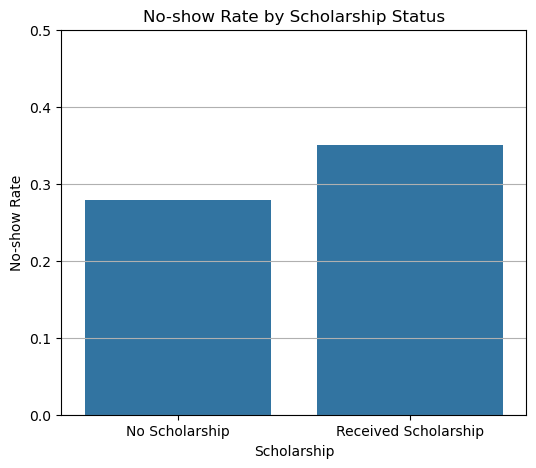

In [53]:
# Group by Scholarship
sch_group = df.groupby("Scholarship")["No-show"].mean().reset_index()

# Map for labels
sch_group["Scholarship"] = sch_group["Scholarship"].map({0: "No Scholarship", 1: "Received Scholarship"})

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x="Scholarship", y="No-show", data=sch_group)
plt.title("No-show Rate by Scholarship Status")
plt.ylabel("No-show Rate")
plt.ylim(0, 0.5)
plt.grid(axis="y")
plt.show()


# ✅ Insight:
Patients who received a scholarship (i.e., likely low-income) have a significantly higher no-show rate compared to those who didn’t.

This implies a financial or logistical barrier even when care is subsidized.

# 💡 Recommendation:
Investigate the underlying reasons for dropouts in this group (e.g., transport costs, time-off work, health literacy).

Provide additional support services like:

Transport vouchers

Call-based follow-ups

Flexible rescheduling policies

Collaborate with social workers or NGOs to ensure care access isn’t disrupted due to economic hardship.

# 9. How does the day of the week affect attendance?

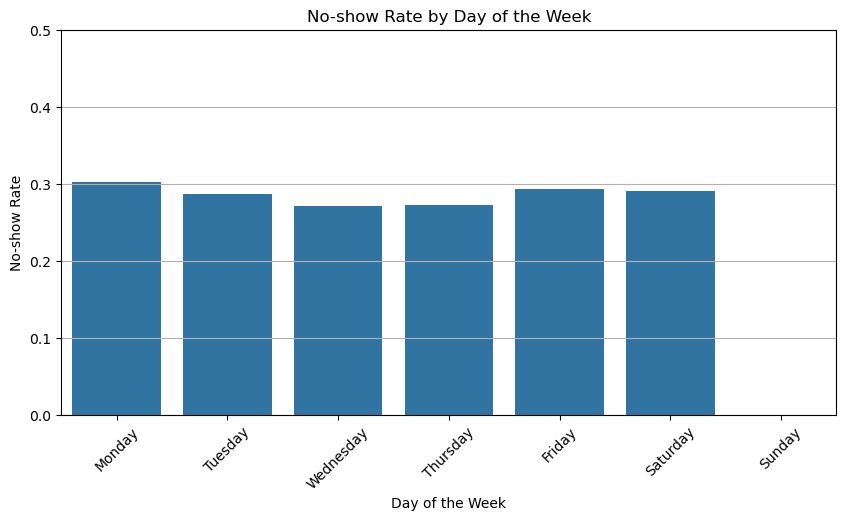

In [64]:
df["AppointmentWeekday"] = df["AppointmentDay"].dt.day_name()

# Group by weekday and calculate no-show rate
dow_group = df.groupby("AppointmentWeekday")["No-show"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=dow_group.index, y=dow_group.values)
plt.title("No-show Rate by Day of the Week")
plt.ylabel("No-show Rate")
plt.xlabel("Day of the Week")
plt.ylim(0, 0.5)
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.show()



# ✅ Insight:
Monday has the highest no-show rate, slightly above 30%.

Midweek (Wednesday, Thursday) tends to have lower no-show rates.

No appointments seem to occur on Sunday — likely due to clinic closure.

# 💡 Recommendation:
Be cautious when overloading appointments on Mondays — weekend inertia, lack of reminders, or “Monday blues” could be affecting attendance.

Test moving routine appointments to midweek slots for better reliability.

Consider sending weekend reminder nudges for Monday patients (e.g., Saturday evening).

# ADVANCE Exploratory Data Analysis

# 1. Distribution of Patient Ages

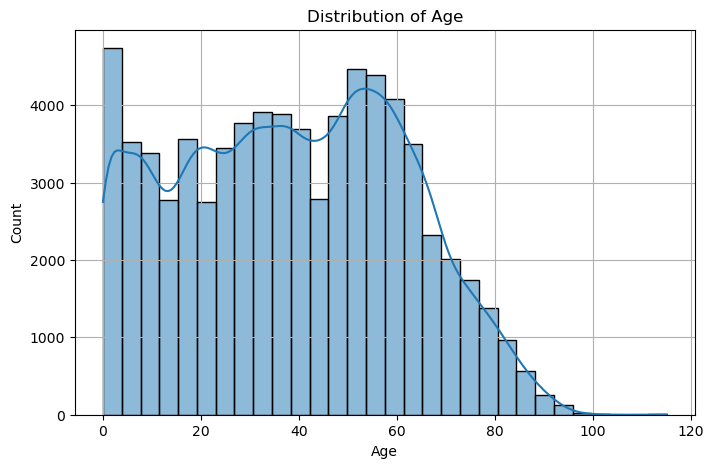

In [68]:
# Histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()


# ✅ Insight:
The dataset contains patients across a wide age range (0–115), with a noticeable peak around 50–60 years.

Age distribution is bimodal:

A large spike among infants and children (0–5)

A second wave in middle-aged and older adults (45–65)

Fewer patients are in their 80s and beyond, forming a natural tail.

# 💡 Recommendation:
When segmenting for behavior (e.g., no-show analysis), consider using age bands like:

Children (0–10)

Young Adults (11–30)

Adults (31–50)

Seniors (51–70)

Elderly (71+)

## Implementation 

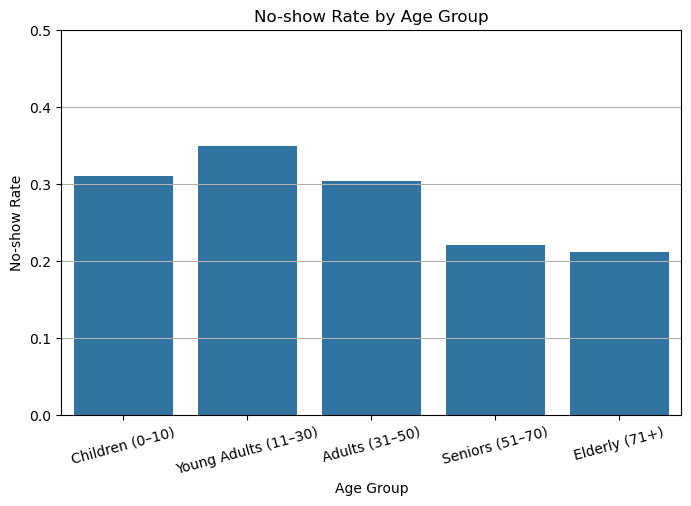

In [174]:
# Step 1: Define age bins and labels
age_bins = [0, 10, 30, 50, 70, 120]
age_labels = ['Children (0–10)', 'Young Adults (11–30)', 'Adults (31–50)', 'Seniors (51–70)', 'Elderly (71+)']

# Step 2: Create a new column for Age Group
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Step 3: Group by Age Group and calculate mean no-show rate
age_grouped = df.groupby('AgeGroup', observed=False)["No-show"].mean().reset_index()
age_grouped.columns = ['Age Group', 'No-show Rate']

# Step 4: Plot the no-show rate by Age Group
plt.figure(figsize=(8,5))
sns.barplot(x="Age Group", y="No-show Rate", data=age_grouped)
plt.title("No-show Rate by Age Group")
plt.ylabel("No-show Rate")
plt.xlabel("Age Group")
plt.ylim(0, 0.5)
plt.grid(axis='y')
plt.xticks(rotation=15)
plt.show()


# 2. Boxplot Analysis: Age vs No-show Behavior

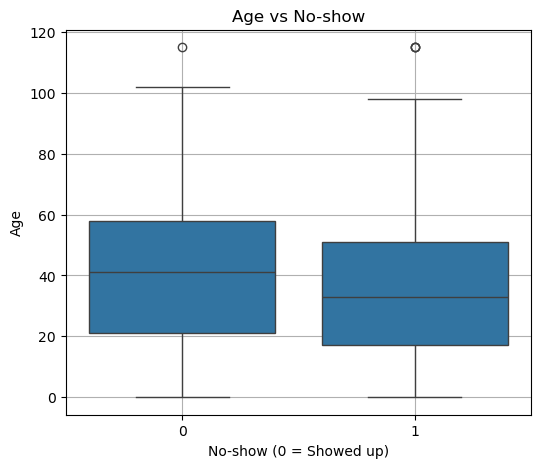

In [70]:
# Boxplot: Age vs No-show
plt.figure(figsize=(6, 5))
sns.boxplot(x="No-show", y="Age", data=df)
plt.title("Age vs No-show")
plt.xlabel("No-show (0 = Showed up)")
plt.ylabel("Age")
plt.grid(True)
plt.show()


# 🔍 Insights:
Median Age Difference:

Patients who showed up (No-show = 0) tend to be older, with a median age around 40–45.

Patients who missed appointments (No-show = 1) have a lower median age, around 30–35.

Spread & Outliers:

Both groups have outliers, but the showed-up group shows slightly more variability in older age ranges (70–100).

Younger individuals (0–10) are present in both groups, but appear more concentrated in the no-show group.

# ✅ Recommendations:
Target younger patients (esp. 15–35 age group) with behavioral nudges like:

In-app reminders, engaging follow-ups, gamification (like points for attendance).

Consider elderly-friendly scheduling (e.g., early morning or weekend slots) for seniors who consistently show up — this can improve system efficiency.

Further analysis on age + other factors (like SMS or scholarship) may reveal stronger multi-factorial patterns.



# 3. Visualization: Age Distribution by Gender

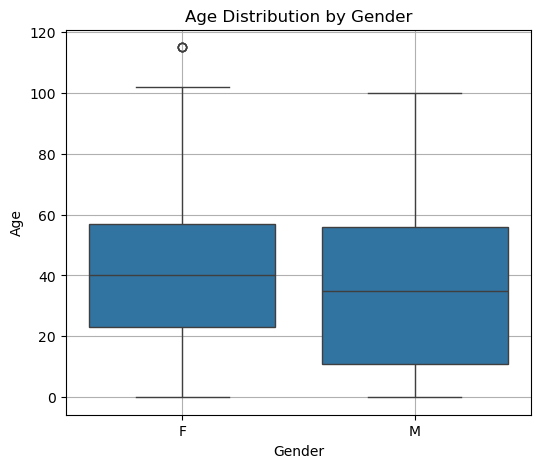

In [185]:
plt.figure(figsize=(6, 5))
sns.boxplot(x="Gender", y="Age", data=df)
plt.title("Age Distribution by Gender")
plt.grid(True)
plt.show()



# 🔍 Insights:
Females tend to have a higher median age compared to males.

Both genders have similar interquartile ranges (IQR), but females show slightly more outliers at higher ages.

The spread of age is broader in females, suggesting a more diverse age group seeking appointments.

# ✅ Recommendations:
Design gender-sensitive health communication: older female patients might require more personalized follow-ups or reminders.

Segmenting patients not only by age but by gender-age clusters (e.g., elderly females) may reveal deeper behavioral trends in no-shows or service needs.

# 4. Visualization: Waiting Days by SMS Received Status

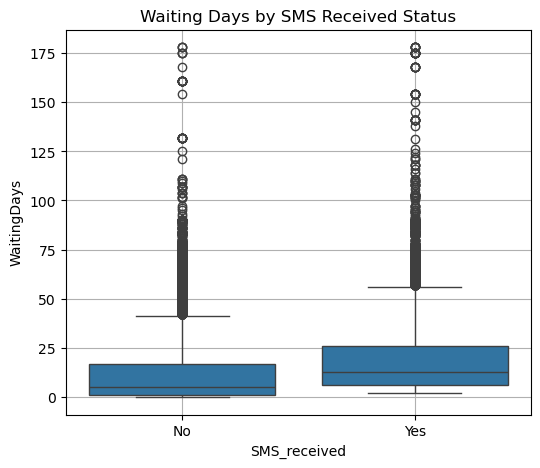

In [187]:
plt.figure(figsize=(6, 5))
sns.boxplot(x="SMS_received", y="WaitingDays", data=df)
plt.title("Waiting Days by SMS Received Status")
plt.xticks([0, 1], ["No", "Yes"])
plt.grid(True)
plt.show()

# 🔍 Insights:
Patients who received SMS reminders had a longer median waiting time compared to those who didn’t.

There's a wider distribution and more outliers in the "Yes" group, indicating that reminders were often sent for appointments scheduled further out.

Shorter waiting periods are more common when no SMS is sent—likely same-day or next-day appointments.

# ✅ Recommendations:
For longer waiting periods, SMS reminders are essential, but their timing and frequency might need optimization.

Consider sending follow-up reminders (e.g., 2–3 days before the appointment) especially for patients with waiting time > 15 days.

Investigate if the delay caused by longer waiting days contributes to higher no-show risk, even with reminders.

# 5. Visualization: Age Distribution by Scholarship Status

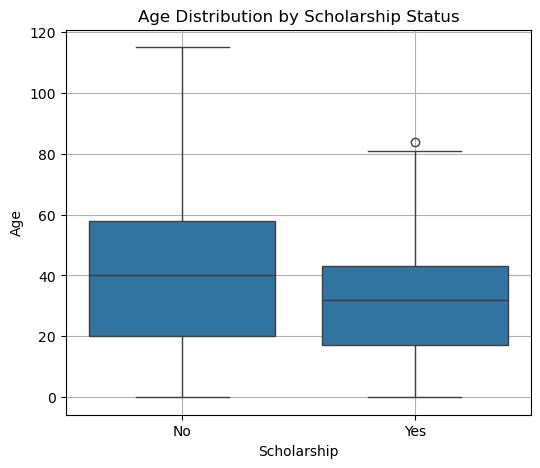

In [76]:
plt.figure(figsize=(6, 5))
sns.boxplot(x="Scholarship", y="Age", data=df)
plt.title("Age Distribution by Scholarship Status")
plt.xticks([0, 1], ["No", "Yes"])
plt.grid(True)
plt.show()


# 🔍 Insights:
Patients who received scholarships tend to be younger, mostly between ages 15 to 45, with a lower median age than those without scholarships.

The non-scholarship group shows a wider age range, including a significant number of elderly patients (60+).

Outliers are present in both groups, but more skewed toward older ages in the non-scholarship group.

# ✅ Recommendations:
When analyzing no-show rates, it's important to segment by age in scholarship-related studies to avoid confounding effects.

Young adults receiving scholarships might need custom reminder strategies (e.g., app-based nudges or gamification).

For elderly non-scholarship patients, consider transportation assistance or follow-up calls.

# 6. Pairplot – Multivariate Visual Relationships Between Key Features & No-show Status

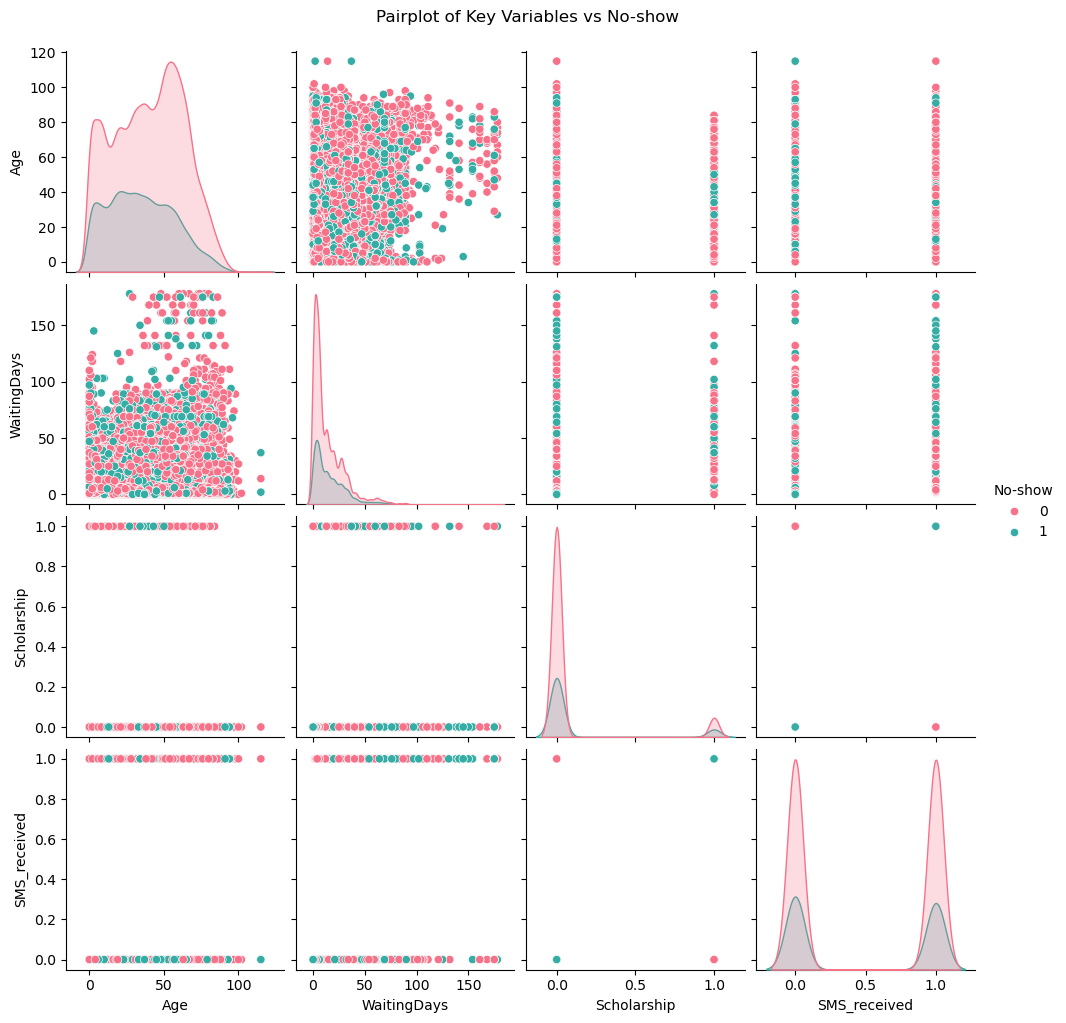

In [82]:
# Sample columns for pairplot
sample_cols = ["Age", "WaitingDays", "Scholarship", "SMS_received", "No-show"]

sns.pairplot(df[sample_cols], hue="No-show", palette="husl")
plt.suptitle("Pairplot of Key Variables vs No-show", y=1.02)
plt.show()


# 🔍 Insights:
Age vs No-show:

Patients who showed up (0) tend to be slightly older than those who didn't.

High density of no-show (1) is seen in the younger age group, especially under 40.

WaitingDays vs No-show:

Longer waiting times are slightly associated with no-show, but both distributions are heavily skewed toward short wait times.

There is a denser cluster of no-shows in low to mid wait periods.

Scholarship vs No-show:

A slightly higher density of no-shows among those who received scholarships, indicating that socioeconomic factors might influence attendance.

SMS_received vs No-show:

Very slight reduction in no-show rate among those who received SMS reminders, though the difference isn’t visually significant.

Indicates SMS alone might not be sufficient as a reminder strategy.

# ✅ Recommendations:
Target younger patients with additional engagement (calls, follow-ups), since they have higher no-show density.

Consider reducing wait time between scheduling and appointment for at-risk groups.

Scholarship holders may require non-financial support (e.g., transport help, community outreach) to improve attendance.

Explore combining SMS with personalized reminders (e.g., WhatsApp/call follow-up) for better effectiveness.



# 📊 Key Takeaways & Next Steps

## ✅ Summary of Insights:
- **~28.5% of appointments were no-shows** — highlighting a major inefficiency in healthcare operations.
- **Younger patients (0–30)** and those from **low-income backgrounds** (Scholarship recipients) showed higher no-show rates.
- **Chronic condition patients (Hypertension, Diabetes)** had better attendance — likely due to stronger health awareness.
- **SMS reminders had limited impact** on reducing no-shows — pointing toward the need for smarter engagement strategies.
- **Longer waiting periods** between scheduling and appointments significantly increased the chance of a no-show.
- **Certain neighborhoods** exhibited >50% no-show rates — indicating location-specific barriers like transport or awareness.

---

## 🔮 What’s Next (Recommendations):
- Build a **predictive model** to identify high-risk no-show patients.
- Design **personalized reminder systems** (e.g., WhatsApp, calls, app notifications) for younger or high-risk groups.
- Launch **targeted outreach** in high-risk neighborhoods — mobile clinics, transport vouchers, or awareness drives.
- Collaborate with hospital management to optimize **scheduling policies** (e.g., avoid Mondays, reduce waiting times).
- Consider **economic and behavioral interventions** like gamified attendance or small incentives for high-risk groups.

---

📌 *This analysis lays the foundation for developing real-world AI healthcare tools to reduce absenteeism and improve resource utilization.*
